Copyright statement?

# A New "Transition"
Welcome back! At this point in the course you are all likley aces at numerical analysis, expecially after 5 modules ranging from Diffusion, to Convection, to Conduction, in 1 or 2D, with various Neumann and Dirichlet Boundary conditions! 

But now it's time for a new "phase". In this lesson we begin looking at what happens when your nice rigid boundary conditions decide to start moving on you, essentially creating a moving boundary interface! 

A moving boundary interface is represented by numerous physical behaviors in real-world applications, from the polar ice caps melting, to the phase transformations of metal alloys, to the varying oxygen content of  muscles near a clotted bloodvessel [2].

![Image](Examples1.jpg)
 #### Real World Applications of a Moving Boundary Interface

### The Stefan Problem
This new type of problem is known as the "Stefan Problem" as it was first studied by Slovene physicist Jozef Stefan around 1890 [3]. Though his focus was primarily on the analysis of ice formations, nowadays his name is synonymous with the particular type of boundary value problem for PDEs where the boundary can move with time.  Since the classic Stefan problem concentrated on the temperature distribution of a homogeneous material undergoing a phase transition, one of the most commonly studied Stefan problems today is the melting of Ice to Water!

![Image](Picture2.jpg)
 #### Jozef Stefan pioneered work into phase transitions of materials (ie Ice)

## A Review: 1D Heat Conduction

Recall from both Modules 2 and 4 we took a loook at the Diffusion equation in 1D:

$$\begin{equation}
\frac{\partial U}{\partial t} = \alpha \frac{\partial^2U}{\partial x^2}
\end{equation}$$

Where we have the temperature distribution $U(x,t)$ and the thermal diffusivity $\alpha$. While before we looked at the conduction of heat through a graphit rod of length 1 meter, in this scenario we will analyze heat condcution though a 1D rod of ice.  Lets first state some basic assumptions and coefficients associated with the simplified Stefan Problem:


##### Thermal Properties of Ice at ~$0^{\circ}C$:
Thermal Conductivity: $k = 2.22 \frac{W}{mK}$

Density: $\rho \approx 1000 \frac{kg}{m^3}$

Specific Heat: $c_{p}= 2.05x10^{-3} \frac{J}{kgK}$

and lastly, Thermal Diffusivity: $\alpha = \frac{k_{ice}}{\rho_{ice}c_{p_{ice}}} = 1.083x10^{-6} \frac{m^2}{sec}$

Melting Temperature of Ice is: $T_{melt}=0^{\circ}C$


Okay! With that out of the way, lets look at the temperature distribution across the a rod of ice of length 1m with some basic initial and boundary conditions. For this first scenario, we will not take into account phase transition if temperatures hit $T_{melt}$, and will therefore assume a static boundary condition.

##### Problem Setup
Governing Equation: $$\begin{equation}
\frac{\partial U}{\partial t} = \alpha \frac{\partial^2U}{\partial x^2}
\end{equation}$$

Boundary Conditions: 

LHS: $\frac{\partial U}{\partial x} = e^{\beta t}$,   @x=0, t>0, time-dependant (increasing) heat flux in 

RHS: $\frac{\partial U}{\partial x} = 0$,  @x=L, t>0,   Insulated end, no heat flux in/out. 


Initial Conditions:

$U(x,t) = -10^{\circ}C$, for 0<x<L, t=0

Lets start coding!!


In [694]:
import numpy
from matplotlib import pyplot
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family']= 'serif'
rcParams['font.size']=16
from IPython.display import Image

Now lets define a function to run the governing equations using the Forward-Time/Central-Difference Method discretization

In [695]:
def FTCS(U, nt, dt, dx, alpha, beta):
    
    for n in range(nt):
        
        Un=U.copy()
        U[1:-1] = Un[1:-1] + alpha*(dt/dx**2)*(Un[2:]-2*Un[1:-1]+Un[0:-2])
        
        #Boundary Conditions 
        
        U[-1]=U[-2]                  #RHS Insulated BC
        
        t=n*dt                                    #Increasing time = n*timestep(dt)
        U[0]=numpy.exp(beta*t)-1   #LHS Time dependant heat input in, BC
        
    return U

In [696]:
#Basic Parameters and Initialization

# Temperature scale: Celsius 
# Length scale: meters
# Mass scale: kg
# Time scale: seconds
# Energy scale: Joules
# Power scale: Watts

L = 1                                                         # Length of my ice rod
nt = 40000                                                  # Number of timesteps
nx = 51                                                     # Number of gird space steps
alpha = 1.083e-6                                      # Thermal Diffusivity
dx = L/(nx-1)                                           # grid spacing in "x" 
Ui = numpy.ones(nx)*(-10)                    # initialized Temperature array
beta = 0.001                                               #Growth Factor of my Temperature input


sigma = 1/2                                             # Stability*
dt=0.1                                                      # Timestep chosen to be 0.1 seconds*

A word on Stability:

Recall from module 2 we had the Courant-Friedrichs-Lewy (CFL) Stability condition for the FTCS Diffusion equation in the form:
$$\sigma = \alpha \frac{\Delta t}{\Delta x^{2}} \leq \frac{1}{2} $$

re-arranging to determine the upper limit for a time-step (dt) we have:
$$\Delta t \leq \frac{\sigma \Delta x^{2}}{\alpha} \approx 923 seconds$$

As you can see, chosing a time-step (dt) equal to $0.1$ seconds, we more than satisfy this CFL Stability condition.


Initial ice rod temperature


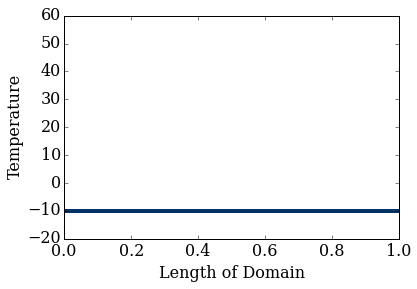

In [697]:
x = numpy.linspace(0, 1, nx)
print('Initial ice rod temperature')
pyplot.plot(x, Ui, color = '#003366', ls = '-', lw =4)
pyplot.ylim(-20, 60)
pyplot.xlabel('Length of Domain')
pyplot.ylabel('Temperature')


Total elapsed time is  4000.0 seconds, or 66.66666666666667 minutes


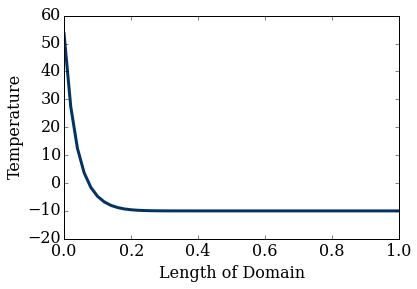

In [698]:
U = FTCS(Ui.copy(), nt, dt, dx, alpha, beta)
print('Total elapsed time is ', nt*dt, 'seconds, or', nt*dt/60, 'minutes' )
pyplot.plot(x, U, color = '#003366', ls = '-', lw =3)
pyplot.ylim(-20, 60)
pyplot.xlim(0, 1)
pyplot.xlabel('Length of Domain')
pyplot.ylabel('Temperature')

The above figure shows us the temperature distribution of the ice rod at a point in time approximately 1 hour into applying our heat source. Now this would be all well and good if ice didn't melt (and therefore change phase) at zero degrees. But it does!! 

Lets build a rudimentary function to see what portion of the rod should be water by now, and which part should be ice:

In [699]:
def Phase_graph(U, x, nx):
    phase=numpy.ones(nx)*(-100)
    for n in range(nx):
        if U[n]>0:
            phase[n]=100
    return phase    

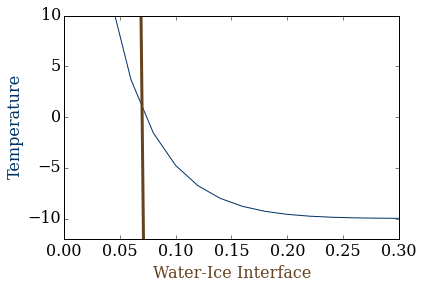

In [700]:
pyplot.plot(x, U, color = '#003366')
pyplot.ylabel('Temperature', color ='#003366')
Phase1=numpy.ones(nx)
Phase=Phase_graph(U, x, nx)
pyplot.plot(x, Phase, color = '#654321', ls = '-', lw =3)
pyplot.ylim(-12, 10)
pyplot.xlim(0, 0.3)
pyplot.xlabel('Water-Ice Interface', color = '#654321')

As you can see, the ice SHOULD have melted about 0.07 meters  (or 2.75 inches) into our rod. In reality, our boundary interface has moved from x=0 to the right as time elapsed.  Not only should our temperature distribution profile change due to the differences in properties ($\rho, k, c_{p}$), but also the feedback from the moving boundary condition.

## Solutions to the Stefan problem: 
### The Variable Grid Method

Before we continue we need to make some simplfications:
##### Simplifying Assumptions:
1) No convection, heat transfer is limited to conduction

2) Pressure is constant

3) Density does not change between the solid and liquid phase (Ice/Water), ie $\rho_{ice}=\rho_{water}\approx 1000 \frac{kg}{m^3}$


![Image](Ice 1D Domain.jpg)
 #### Domain

# References

1. Kutluay S., The numerical solution of one-phase classical Stefan problem, Journal of Computational and Applied Mathematics 81 (1997) 135-144

2. Javierre, E., A Comparison of Numeical Models for one-dimensional Stefan problems, Journal of Compuational and Applied Mathematics 192 (2006) 445-459

3. Vuik, C., "Some historical notes about the Stefan problem". Nieuw Archief voor Wiskunde, 4e serie 11 (2): 157-167 (1993)

4. Crowley, A. B., Numerical Solution of Stefan Problems, Brunel University, Department of Mathematics, TR/69 December 1976

In [701]:
# Execute this cell to load the notebook's style sheet, then ignore it
from IPython.core.display import HTML
css_file ='numericalmoocstyle.css'
HTML(open(css_file, "r").read())